In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

df=pd.read_csv('PATH AND FILE', encoding='CP949')
font_name = font_manager.FontProperties(fname="PATH AND FONT").get_name()
rc('font', family=font_name)

df=df.drop(df[(df['gameduration']<=900)].index)
df

,idx,area,pick_1,pick_2,pick_3,pick_4,pick_5,gameduration,first_blood,first_tower,tower_kills,first_inhibitor,first_rift,first_dragon,dragon_kills,first_baron,baron_kills,result
0,0,100,38,497,164,19,145,1514,True,True,2,False,True,False,1,False,0,Fail
1,1,200,114,876,4,57,21,1514,False,False,5,False,False,True,2,True,1,Win
2,2,100,64,22,99,131,57,2004,True,False,4,False,True,True,1,False,0,Fail
3,3,200,120,67,117,84,516,2004,False,True,6,True,False,False,4,True,1,Win
4,4,100,39,25,64,51,517,1610,True,False,1,False,True,False,0,False,0,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339657,339657,200,102,84,236,201,43,1964,False,False,5,True,False,True,2,False,1,Win
339658,339658,100,202,412,76,39,240,2362,True,True,8,True,True,False,4,True,2,Win
339659,339659,200,41,2,99,235,7,2362,False,False,3,False,False,True,2,False,0,Fail
339660,339660,100,875,30,91,51,114,2043,False,False,6,True,False,False,1,False,0,Fail


In [13]:
df2=df[[
    'area',
    'gameduration',
    'first_blood',
    'first_tower',
    'tower_kills',
    'first_inhibitor',
    'first_rift',
    'first_dragon',
    'dragon_kills',
    'first_baron',
    'baron_kills',
    'result'
]]
df2

,area,gameduration,first_blood,first_tower,tower_kills,first_inhibitor,first_rift,first_dragon,dragon_kills,first_baron,baron_kills,result
0,100,1514,True,True,2,False,True,False,1,False,0,Fail
1,200,1514,False,False,5,False,False,True,2,True,1,Win
2,100,2004,True,False,4,False,True,True,1,False,0,Fail
3,200,2004,False,True,6,True,False,False,4,True,1,Win
4,100,1610,True,False,1,False,True,False,0,False,0,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...
339657,200,1964,False,False,5,True,False,True,2,False,1,Win
339658,100,2362,True,True,8,True,True,False,4,True,2,Win
339659,200,2362,False,False,3,False,False,True,2,False,0,Fail
339660,100,2043,False,False,6,True,False,False,1,False,0,Fail


In [3]:
#result만 바꿀 시
df2['result']=df2['result'].apply(lambda x: False if x == 'Fail' else True)
df2

<ipython-input-3-b68b935f4e1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['result']=df2['result'].apply(lambda x: False if x == 'Fail' else True)


,area,gameduration,first_blood,first_tower,tower_kills,first_inhibitor,first_rift,first_dragon,dragon_kills,first_baron,baron_kills,result
0,100,1514,True,True,2,False,True,False,1,False,0,False
1,200,1514,False,False,5,False,False,True,2,True,1,True
2,100,2004,True,False,4,False,True,True,1,False,0,False
3,200,2004,False,True,6,True,False,False,4,True,1,True
4,100,1610,True,False,1,False,True,False,0,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
339657,200,1964,False,False,5,True,False,True,2,False,1,True
339658,100,2362,True,True,8,True,True,False,4,True,2,True
339659,200,2362,False,False,3,False,False,True,2,False,0,False
339660,100,2043,False,False,6,True,False,False,1,False,0,False


In [14]:
#result와 bool 모두 바꿀 시
df2['result']=df2['result'].apply(lambda x: 0 if x == 'Fail' else 1)
df2['area']=df2['area'].apply(lambda x: 0 if x == 100 else 1)
df2['first_blood']=df2['first_blood'].apply(lambda x: 0 if x ==  False else 1)
df2['first_tower']=df2['first_tower'].apply(lambda x: 0 if x ==  False else 1)
df2['first_inhibitor']=df2['first_inhibitor'].apply(lambda x: 0 if x ==  False else 1)
df2['first_rift']=df2['first_rift'].apply(lambda x: 0 if x ==  False else 1)
df2['first_dragon']=df2['first_dragon'].apply(lambda x: 0 if x ==  False else 1)
df2['first_baron']=df2['first_baron'].apply(lambda x: 0 if x ==  False else 1)

df2

<ipython-input-14-1f869f636531>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['result']=df2['result'].apply(lambda x: 0 if x == 'Fail' else 1)
<ipython-input-14-1f869f636531>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['area']=df2['area'].apply(lambda x: 0 if x == 100 else 1)
<ipython-input-14-1f869f636531>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,area,gameduration,first_blood,first_tower,tower_kills,first_inhibitor,first_rift,first_dragon,dragon_kills,first_baron,baron_kills,result
0,0,1514,1,1,2,0,1,0,1,0,0,0
1,1,1514,0,0,5,0,0,1,2,1,1,1
2,0,2004,1,0,4,0,1,1,1,0,0,0
3,1,2004,0,1,6,1,0,0,4,1,1,1
4,0,1610,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
339657,1,1964,0,0,5,1,0,1,2,0,1,1
339658,0,2362,1,1,8,1,1,0,4,1,2,1
339659,1,2362,0,0,3,0,0,1,2,0,0,0
339660,0,2043,0,0,6,1,0,0,1,0,0,0


In [15]:
corr=df2.corr(method='pearson')
print(corr)

                     area  gameduration  first_blood  first_tower  \
area             1.000000      0.000000    -0.031822    -0.061183   
gameduration     0.000000      1.000000     0.000000     0.002065   
first_blood     -0.031822      0.000000     1.000000     0.213496   
first_tower     -0.061183      0.002065     0.213496     1.000000   
tower_kills     -0.030893      0.362174     0.188179     0.494074   
first_inhibitor -0.028193      0.202192     0.144887     0.371835   
first_rift      -0.115272      0.006375     0.145352     0.494240   
first_dragon     0.064709      0.003247     0.151435     0.205135   
dragon_kills     0.038392      0.446690     0.165580     0.327886   
first_baron      0.018867      0.381217     0.066875     0.171677   
baron_kills      0.021890      0.505407     0.058153     0.145090   
result          -0.026341      0.000000     0.198709     0.478471   

                 tower_kills  first_inhibitor  first_rift  first_dragon  \
area               -0.03089

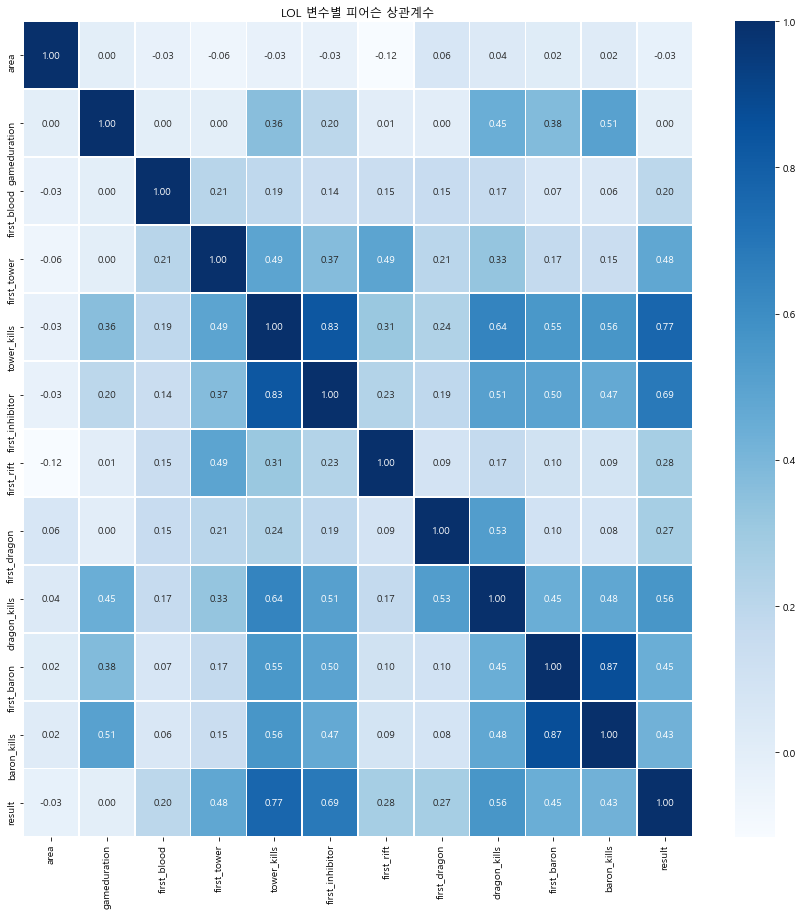

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

df2_heatmap=df[[
    'area',
    'gameduration',
    'first_blood',
    'first_tower',
    'tower_kills',
    'first_inhibitor',
    'first_rift',
    'first_dragon',
    'dragon_kills',
    'first_baron',
    'baron_kills',
    'result'
]]

plt.figure(figsize=(15,15))
plt.title('LOL 변수별 피어슨 상관계수')
sns.heatmap(data = df2.corr(method='pearson'), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
